This is run on `chinook`. 

In [1]:
import itertools
import time
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import dask

In [2]:
testyears_1 = ['2010', '2011']
testyears_2 = ['2012', '2013']
testyear = 1967
months = [str(item).zfill(2) for item in range (1, 13)]
filepattern_1 = "era5_wrf_dscale_4km"

In [3]:
datadir = Path("/import/beegfs/CMIP6/wrf_era5/04km/")

## First option: Loop through year / month files and aggregate

In [7]:
list((datadir / f"{testyear}").glob(f"{filepattern_1}_{testyear}-08*.nc"))

# datadir / f"{yr}"

[PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-14.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-03.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-02.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-15.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-17.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-01.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-16.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-05.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-12.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-13.nc'),
 PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-08-04.nc'),
 PosixPath('/import/b

In [13]:
loopmth = months[6:8]
len(loopmth)

2

In [14]:
loopyr = testyear
loopmth = months[6:8]
time = pd.date_range(testyear, freq="ME", periods=len(loopmth), name='time')

collect = []
for mth in loopmth:
    fpths =  sorted(list((datadir / f"{testyear}").glob(f"{filepattern_1}_{testyear}-{mth}*.nc")))
    print(fpths)
    acc = [xr.open_dataset(pth).acsnow.sum(dim='Time') for pth in fpths]
    collect.append(sum(acc))

monthly_snowacc_1 = xr.concat(collect, dim=time)
            

[PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-01.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-02.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-03.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-04.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-05.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-06.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-07.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-08.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-09.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-10.nc'), PosixPath('/import/beegfs/CMIP6/wrf_era5/04km/1967/era5_wrf_dscale_4km_1967-07-11.nc'), PosixPath('/import/beegfs/CMIP6

## Second option: use `open_mfdataset` and handle aggregation internally

In [ ]:
filelist_2 = sorted(list(itertools.chain(*[
    list((datadir / f"{yr}").glob("era5_wrf_dscale_4km_*.nc")) for yr in testyears_2])))


In [ ]:
filelist_2

[PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-01.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-02.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-03.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-04.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-05.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-06.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-07.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-08.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-09.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-10.nc'),
 PosixPath('/import/SNAP/cwaigl/wrf_era5/04km/2012/era5_wrf_dscale_4km_2012-01-11.nc'),
 PosixPath('/import/SNAP/cwaigl/

In [ ]:
%%timeit
with xr.open_mfdataset(filelist_2[:152], parallel=True, chunks='auto') as ds:
    snowacc = ds.acsnow

monthly_snowacc_2 = snowacc.resample(Time='ME').sum()


45.1 s ± 850 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
with xr.open_mfdataset(filelist_2[:152], parallel=True, chunks = {'Time':-1, 'south_north':225, 'west_east':210}) as ds:
    snowacc = ds.acsnow

monthly_snowacc_2 = snowacc.resample(Time='ME').sum()

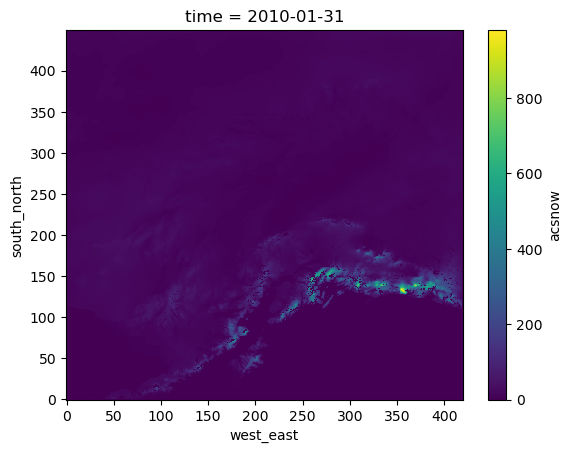

In [ ]:
monthly_snowacc_1.isel(time=0).plot()

In [ ]:
monthly_snowacc_1

<xarray.DataArray 'acsnow' (time: 5, south_north: 450, west_east: 420)> Size: 4MB
dask.array<concatenate, shape=(5, 450, 420), dtype=float32, chunksize=(1, 225, 210), chunktype=numpy.ndarray>
Coordinates:
    XLONG    (south_north, west_east) float32 756kB -164.9 -164.9 ... -128.6
    XLAT     (south_north, west_east) float32 756kB 55.13 55.14 ... 70.53 70.52
  * time     (time) datetime64[ns] 40B 2010-01-31 2010-02-28 ... 2010-05-31
Dimensions without coordinates: south_north, west_east

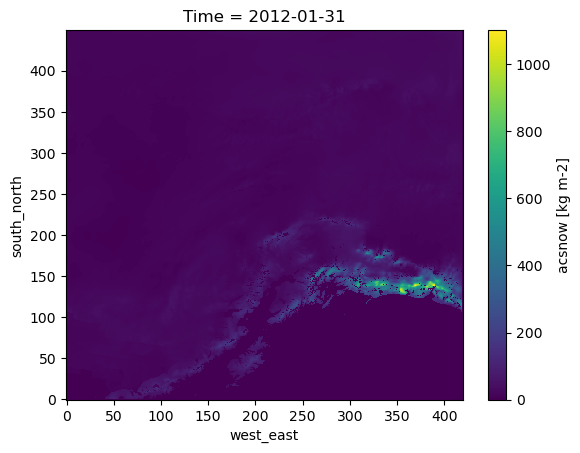

In [ ]:
monthly_snowacc_2.isel(Time=0).plot()

In [ ]:
monthly_snowacc_2

<xarray.DataArray 'acsnow' (Time: 5, south_north: 450, west_east: 420)> Size: 4MB
dask.array<stack, shape=(5, 450, 420), dtype=float32, chunksize=(1, 225, 210), chunktype=numpy.ndarray>
Coordinates:
    XLONG    (south_north, west_east) float32 756kB dask.array<chunksize=(225, 210), meta=np.ndarray>
    XLAT     (south_north, west_east) float32 756kB dask.array<chunksize=(225, 210), meta=np.ndarray>
  * Time     (Time) datetime64[ns] 40B 2012-01-31 2012-02-29 ... 2012-05-31
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  HOURLY ACCUMULATED SNOW
    units:        kg m-2
    stagger:      
    projection:   PolarStereographic(stand_lon=-152.0, moad_cen_lat=63.999992...

In [ ]:
monthly_snowacc_1.to_netcdf("snowacc1_test.nc", encoding={'acsnow': 
        {"zlib": True, "complevel": 5}})

In [ ]:
with xr.open_dataset(datadir / "2000/era5_wrf_dscale_4km_2000-01-01.nc") as ds:
    snowacc = ds.acsnow
snowacc

KeyboardInterrupt: 